In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# For binary classification, we'll choose two classes. For example, let's use class 0 (airplane) and class 1 (automobile).
class_0 = 0
class_1 = 1

# Filter the data to include only these two classes
train_filter = np.isin(y_train, [class_0, class_1]).flatten()
test_filter = np.isin(y_test, [class_0, class_1]).flatten()

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Convert labels to binary (0 and 1)
y_train = np.where(y_train == class_0, 0, 1)
y_test = np.where(y_test == class_0, 0, 1)

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=2,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# Save the model
model.save('cnn_binary_model.h5')

# Print the final test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.7240 - loss: 0.5170 - val_accuracy: 0.8775 - val_loss: 0.2888
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.8711 - loss: 0.3005 - val_accuracy: 0.9190 - val_loss: 0.2041


63/63 - 1s - 11ms/step - accuracy: 0.9190 - loss: 0.2041

Test accuracy: 0.9190


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


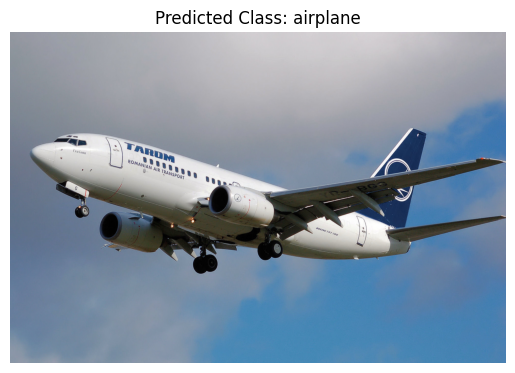

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('cnn_binary_model.h5')

# Define the class labels for CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Load and preprocess the example image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch axis
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Path to the example image
img_path = '/content/Tarom.b737-700.yr-bgg.arp.jpg'  # Replace with the path to your image

# Preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Display the image and the predicted class
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Predicted Class: {class_names[predicted_class]}')
plt.axis('off')
plt.show()
